# Algotytm przecinania się odcinków na płaszczyźnie

In [4]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [5]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()


def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

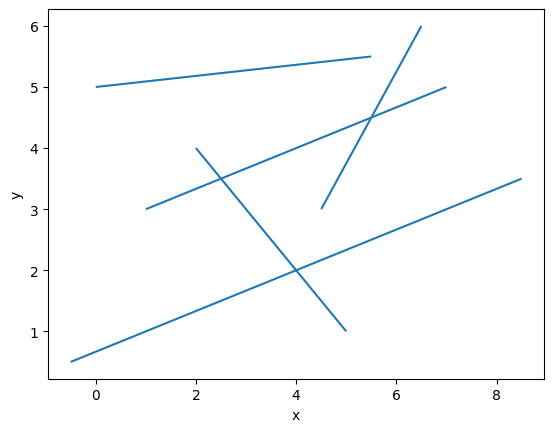

In [6]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

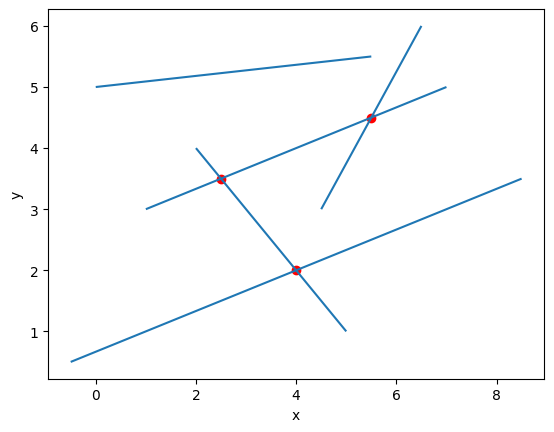

In [7]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [8]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    sections = []
    for i in range(n):
        x1 = np.random.uniform(0, max_x)
        x2 = np.random.uniform(0, max_x)
        y1 = np.random.uniform(0, max_y)
        y2 = np.random.uniform(0, max_y)
        if x1 == x2:
            x1 += np.random.uniform(0.001, max_x-x1)
        sections.append(((x1, y1), (x2, y2)))
    return sections

In [9]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.208s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [10]:
section = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

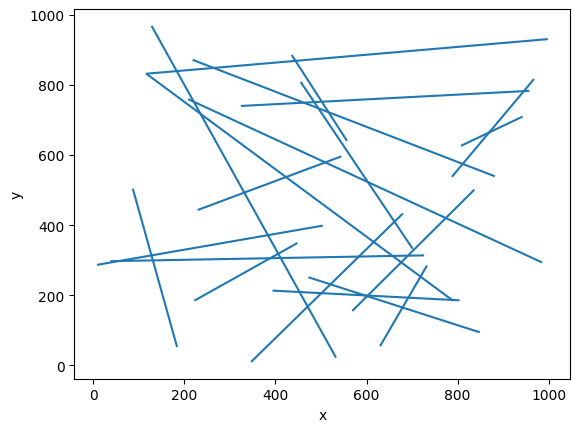

In [11]:
vis = Visualizer()
for sec in section:
    vis.add_line_segment(sec)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [12]:
%matplotlib tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button


class myPlot:
    def __init__(self) -> None:
        fig, ax = plt.subplots()
        fig.subplots_adjust(bottom=0.2)
        fig.canvas.mpl_connect('button_press_event', self.on_click)
        self.fig = fig
        # ax = plt.axes(autoscale_on=False)
        self.ax = ax
        self.prev_points = []
        self.lines = []
        self.autoscaling = False

    def reset(self, event):
        self.prev_point = []
        self.lines = []
        self.draw()

    def print_segments(self, event):
        if len(self.lines) == 0:
            print("Nie ma zapisanych odcinków")
        output = [((line.get_xdata()[0], line.get_ydata()[0]), (line.get_xdata()[1], line.get_ydata()[1])) for line in self.lines]
        # for line in self.lines:
        #     print((line.get_xdata()[0], line.get_ydata()[0]), (line.get_xdata()[1], line.get_ydata()[1]))
        print(output)

    def undo(self, event):
        if len(self.prev_points) == 0:
            return

        if len(self.prev_points) > 1:
            self.lines.pop()
        self.prev_points.pop()
        self.draw()

    def add_point(self, point):
        self.prev_points.append(point)

    def add_line(self, line):
        self.lines.append(line)

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        x, y = event.xdata, event.ydata
        if len(self.prev_points) in [0, 2]:
            self.prev_points = []
            self.add_point([x, y])
        else:
            p1 = self.prev_points[-1]
            p2 = [x, y]
            # Create a line using x and y coordinates
            self.add_line(plt.Line2D([p1[0], p2[0]], [p1[1], p2[1]]))
            # self.add_line(plt.Line2D([p1, p2]))
            self.add_point(p2)
        self.draw()

    def draw(self):
        xlim = self.ax.get_xlim()
        ylim = self.ax.get_ylim()
        self.ax.clear()
        if len(self.prev_points) > 0:
            point = self.prev_points[-1]
            self.ax.scatter(point[0], point[1], color='black')
        for line in self.lines:
            self.ax.add_line(line)
        self.ax.autoscale(self.autoscaling)
        if not self.autoscaling:
            self.ax.set_xlim(xlim)
            self.ax.set_ylim(ylim)
        plt.draw()

    def show(self):
        plt.show()


myplot = myPlot()
fig = myplot.fig


# # create buttons
button_y = 0.05
button_width = 0.2
button_height = 0.1
button_n = 3
button_pos = [[i*button_width*1.1+0.1, button_y, button_width,
               button_height] for i in range(button_n)]
axes = [fig.add_axes(pos) for pos in button_pos]
bundo = Button(axes[0], 'Undo')
bundo.on_clicked(myplot.undo)
bprint = Button(axes[1], 'Print segments')
bprint.on_clicked(myplot.print_segments)
breset = Button(axes[2], 'Reset')
breset.on_clicked(myplot.reset)

myplot.show()


In [13]:
%matplotlib inline

In [14]:

def mat_det(a, b):
    return a[0] * b[1] - a[1] * b[0]

Uzupełnij funkcję ```is_intersection```

In [15]:
pointTypes = {
    "start": 0,
    "end": 1,
    "intersection": 2
}


class Point:
    def __init__(self, x, y, segment=None, type=None, payload=None, tolerance=12) -> None:
        self.tolerance = tolerance  # do 5 miejsc po przecinku
        self.x = x
        self.y = y
        self.segment = segment
        self.type = type
        self.key = round(self.x, tolerance), round(self.y, tolerance)
        self.payload = payload

    def __eq__(self, other) -> bool:
        return type(self) == type(other) and self.key == other.key

    def __lt__(self, other):
        return self.y < other.y or (self.y == other.y and self.x < other.x)

    def __gt__(self, other):
        return self.y > other.y or (self.y == other.y and self.x > other.x)

    def __hash__(self) -> int:
        return hash(self.key)

    def __str__(self) -> str:
        return f"({round(self.x,3)}, {round(self.y,3)})"
        # return f"({self.x}, {self.y})"

    def __repr__(self) -> str:
        return self.__str__()


globalX = 0


class Segment:
    id = 0

    def __init__(self, segment) -> None:
        p1, p2 = segment
        temp = p1
        p1 = min(p1, p2, key=lambda x: x[0])
        p2 = max(temp, p2, key=lambda x: x[0])
        p1 = Point(*p1, segment=self, type=pointTypes["start"])
        p2 = Point(*p2, segment=self, type=pointTypes["end"])
        self.p1 = p1
        self.p2 = p2
        self.xLimits = min(p1.x, p2.x), max(p1.x, p2.x)
        self.formula = self.get_formula()
        self.id = Segment.id
        Segment.id += 1

    def get_formula(self):
        x1, y1 = self.p1.x, self.p1.y
        x2, y2 = self.p2.x, self.p2.y
        # returns as lambda function that takes x returns y
        if x1 == x2:
            return lambda x: None
        a = (y1 - y2) / (x1 - x2)
        b = y1 - a * x1
        return lambda x: a * x + b

    def key(self):
        if self.xLimits[0] <= globalX <= self.xLimits[1]:
            return self.formula(globalX)
        return None

    def __eq__(self, other) -> bool:
        return type(self) == type(other) and self.id == other.id

    def __lt__(self, other):
        return self.key() < other.key()

    def __gt__(self, other):
        return self.key() > other.key()

    def __str__(self) -> str:
        return f"({self.p1}, {self.p2})"

    def __repr__(self) -> str:
        return self.__str__()

In [16]:
def getIntersect(seg1: Segment, seg2: Segment):
    """
    Funkcja sprawdza czy dwa odcinki się przecinają
    :param seg1: odcinek 1
    :param seg2: odcinek 2
    :return: True jeśli odcinki się przecinają, False w przeciwnym wypadku
    """
    # Wyznaczenie punktów wspólnych
    x1, x2 = seg1.xLimits
    x3, x4 = seg2.xLimits
    y1, y2 = seg1.formula(x1), seg1.formula(x2)
    y3, y4 = seg2.formula(x3), seg2.formula(x4)
    # Wyznaczenie równań prostych
    den = mat_det([(x1-x2), (x3-x4)], [(y1-y2), (y3-y4)])
    if den == 0:
        return None
    t = mat_det([(x1-x3), (x3-x4)], [(y1-y3), (y3-y4)]) / den
    u = -mat_det([(x1-x2), (x1-x3)], [(y1-y2), (y1-y3)]) / den

    if 0 <= t <= 1 and 0 <= u <= 1:
        return Point(x1 + t*(x2-x1), y1 + t*(y2-y1), type=pointTypes["intersection"], payload=(seg1, seg2))
    return None

In [17]:
import bisect


class TBST:
    def __init__(self) -> None:
        self.tree:  list[Segment] = []

    def insert(self, segment):
        # global globalX
        # globalX = x
        # if segment is None:
        # yield Exception("segment is None")
        bisect.insort(self.tree, segment)

    def swap(self, intersect):
        # global globalX
        # closestX = max(intersect.payload,
        #    key=lambda p: p.xLimits[0]).xLimits[0]
        # globalX = closestX
        seq1, seq2 = intersect.payload
        # shadowSeg = Segment(((globalX-1, intersect.y),
        # (intersect.x+1, intersect.y)))
        i = self.find(seq1)
        # i = bisect.bisect_left(self.tree, seq1)
        # if self.tree[i] != seq1:
        #     i = self.find_by_hand(seq1)
        #     if i is None:
        #         raise Exception("not found")
        j = None
        if i + 1 < len(self.tree) and self.tree[i+1] == seq2:
            j = i+1
        elif i-1 >= 0 and self.tree[i-1] == seq2:
            j = i-1
        else:
            j = self.find(seq2)
        self.__swapInTree(i, j)
        toCheck = []
        lower, higher = min(i, j), max(i, j)
        if lower > 0:
            toCheck += [(self.tree[lower-1], self.tree[lower])]
        if higher < len(self.tree)-1:
            toCheck += [(self.tree[higher+1], self.tree[higher])]
        return toCheck

    def __swapInTree(self, aPos, bPos):
        # secondPointA = max(self.tree[aPos].segment, key=lambda p: p[0])
        # secondPointB = max(self.tree[bPos].segment, key=lambda p: p[0])
        # pointA = Point(x=secondPointA[0], y=secondPointA[1],
        #                segment=self.tree[aPos].segment, type=self.tree[aPos].type)
        # pointB = Point(x=secondPointB[0], y=secondPointB[1],
        #                segment=self.tree[bPos].segment, type=self.tree[bPos].type)
        # self.tree[bPos], self.tree[aPos] = pointA, pointB
        self.tree[bPos], self.tree[aPos] = self.tree[aPos], self.tree[bPos]

    def delete(self, segment):
        # toDelete = Segment(segment)
        # for i in range(len(self.tree)):
        #     if self.tree[i] == toDelete:
        #         self.tree.pop(i)
        #         return
        i = self.find(segment)
        # i = bisect.bisect_left(self.tree, segment)
        toCheck = []
        if i != 0 and i != len(self.tree)-1:
            toCheck += [(self.tree[i-1], self.tree[i+1])]
        # print(f"removing: {self.tree[i]}")
        self.tree.pop(i)
        return toCheck

    def find_by_hand(self, segment):
        for i in range(len(self.tree)):
            if self.tree[i] == segment:
                return i
        return None

    def getNbours(self, segment):
        res = []
        if len(self.tree) == 1:
            return res
        i = self.find(segment)
        # i = bisect.bisect_left(self.tree, segment)
        if i == 0:
            return [self.tree[i+1]]
        if i == len(self.tree)-1:
            return [self.tree[i-1]]
        return [self.tree[i-1], self.tree[i+1]]

    def find(self, segment):
        i = bisect.bisect_left(self.tree, segment)
        if 0 <= i < len(self.tree) and self.tree[i] == segment:
            return i
        i = self.find_by_hand(segment)
        if i is None:
            raise Exception("not found")
        return i

In [18]:
from queue import PriorityQueue


def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    Q = PriorityQueue()
    T = TBST()
    intersections = set()

    def checkAndhandleIntersection(sec1, sec2):
        intersect = getIntersect(sec1, sec2)
        if intersect:
            if intersect not in intersections:
                Q.put((intersect.key, intersect))
                intersections.add(intersect)

    for section in sections:
        segment = Segment(section)
        left = min(section, key=lambda x: x[0])
        leftP = Point(left[0], left[1], segment, pointTypes["start"])
        right = max(section, key=lambda x: x[0])
        rightP = Point(right[0], right[1], segment, pointTypes["end"])
        Q.put((leftP.key, leftP))
        Q.put((rightP.key, rightP))

    global globalX
    prevType = None
    while not Q.empty():
        if len(intersections) > 0:
            return True
        point = Q.get()[1]
        if point.type == pointTypes["start"]:
            globalX = point.x
            newSeg = point.segment
            T.insert(newSeg)
            nbours = T.getNbours(newSeg)
            for nbour in nbours:
                # if nbour is None:
                # break
                checkAndhandleIntersection(newSeg, nbour)

        elif point.type == pointTypes["end"]:
            globalX = point.x
            toCheck = T.delete(point.segment)
            for sec1, sec2 in toCheck:
                checkAndhandleIntersection(sec1, sec2)
        elif point.type == pointTypes["intersection"]:
            if prevType == pointTypes["intersection"]:
                globalX = (globalX+point.x)/2
            toCheck = T.swap(point)
            for sec1, sec2 in toCheck:
                checkAndhandleIntersection(sec1, sec2)
            globalX = point.x
        prevType = point.type
        # print(T.tree)
    # return [(p.x, p.y) for p in intersections]
    return len(intersections) > 0

In [19]:
# # section = [((0.3125, 0.2297794117647058), (0.7903225806451613, 0.6311274509803921)), ((
# #     0.3286290322580645, 0.6311274509803921), (0.6975806451612904, 0.24203431372549017))]
# section = [((-0.5, 0.5), (8.5, 3.5)),
#            ((1, 3), (7, 5)),
#            ((2, 4), (5, 1)),
#            ((4.5, 3), (6.5, 6)),
#            ((0, 5), (5.5, 5.5))]
# section = [((725.8807341104167, 883.4293042406749), (367.19201582569747, 671.6770787497147)), ((136.89462215833248, 463.9725182930372), (198.92094231264934, 719.3521481709241)), ((542.7799497311285, 249.2031298067089), (88.09090098117889, 251.4930310933442)), ((302.02236295372654, 923.3752532957801), (70.23121845732338, 427.56291395593917)), ((469.5744179764243, 389.78913183499674), (250.04627589610496, 546.6531244529035)), ((59.73243400095718, 193.32456837437107), (126.78694433483373, 943.4488100090412)), ((379.3498891179109, 58.789069821667425), (607.3422581516231, 801.878967389482)), ((407.4083916663341, 539.5524507916907), (224.6493818607914, 785.9253652292941)), ((409.7451136183925, 385.3958112394532), (431.9710743256161, 710.3279879330696)), ((415.174394733836, 579.4570139756195), (229.860835822442, 266.5595040129106)), ((
#     588.6205211536466, 947.5715669600971), (985.9696980558851, 525.7326663068686)), ((625.0738849004488, 334.70798559707725), (638.0657129246732, 420.38983718886936)), ((953.9676381342422, 230.8906481632277), (347.2132513807312, 287.8073006695964)), ((706.8962238257552, 216.63835276355348), (673.8043987013478, 137.5310570042112)), ((446.4203718257047, 361.3551851855338), (474.1989709701585, 164.69977002307868)), ((230.89506495268398, 882.3977933128716), (540.1140519204378, 879.4156548980385)), ((204.4910965643052, 882.3939038161909), (916.1800596254822, 4.792063825851733)), ((480.47742322201793, 671.4136000141451), (461.5661587406916, 367.92588342468304)), ((20.017446423061024, 668.4680314113805), (378.58196666447816, 670.8218480621713)), ((819.1621784713428, 605.1377000836642), (718.2911194906691, 382.8120148738611))]

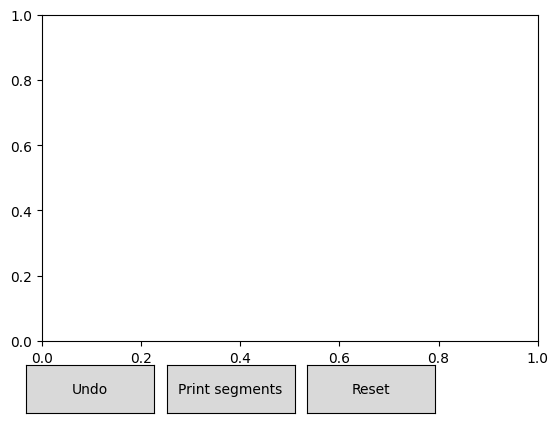

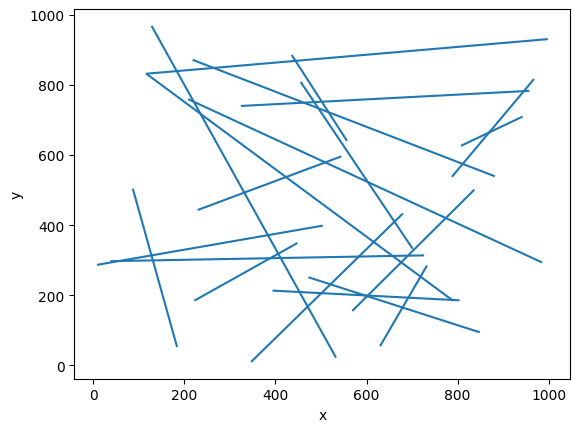

In [20]:
vis = Visualizer()
for sec in section:
    vis.add_line_segment(sec)
vis.show()

In [21]:
sectionOrg = section

In [22]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.003s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [23]:
def is_intersection_with_visualization(sections):  # TODO wizualizacja (jak?)
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [24]:
from queue import PriorityQueue


def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    Q = PriorityQueue()
    T = TBST()
    intersections = set()

    def checkAndhandleIntersection(sec1, sec2):
        intersect = getIntersect(sec1, sec2)
        if intersect:
            if intersect not in intersections:
                Q.put((intersect.key, intersect))
                intersections.add(intersect)
    for section in sections:
        segment = Segment(section)
        left = min(section, key=lambda x: x[0])
        leftP = Point(left[0], left[1], segment, pointTypes["start"])
        right = max(section, key=lambda x: x[0])
        rightP = Point(right[0], right[1], segment, pointTypes["end"])
        Q.put((leftP.key, leftP))
        Q.put((rightP.key, rightP))

    global globalX
    prevType = None
    while not Q.empty():
        point = Q.get()[1]
        if point.type == pointTypes["start"]:
            globalX = point.x
            newSeg = point.segment
            T.insert(newSeg)
            nbours = T.getNbours(newSeg)
            for nbour in nbours:
                # if nbour is None:
                # break
                checkAndhandleIntersection(newSeg, nbour)

        elif point.type == pointTypes["end"]:
            globalX = point.x
            toCheck = T.delete(point.segment)
            for sec1, sec2 in toCheck:
                checkAndhandleIntersection(sec1, sec2)
        elif point.type == pointTypes["intersection"]:
            if prevType == pointTypes["intersection"]:
                globalX = (globalX+point.x)/2
            toCheck = T.swap(point)
            for sec1, sec2 in toCheck:
                checkAndhandleIntersection(sec1, sec2)
            globalX = point.x
        prevType = point.type
        # print(T.tree)
    return [(p.x, p.y) for p in intersections]
    # return [((p.x, p.y), p.payload[0].id, p.payload[1].id) for p in intersections]
    # return [f"{p.x} {p.y} {p.payload[0].id} {p.payload[1].id}" for p in intersections]

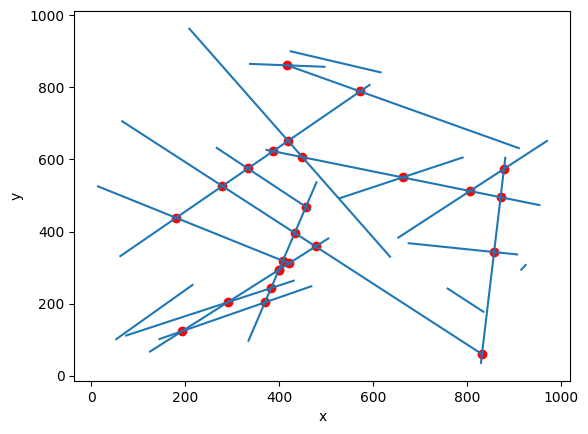

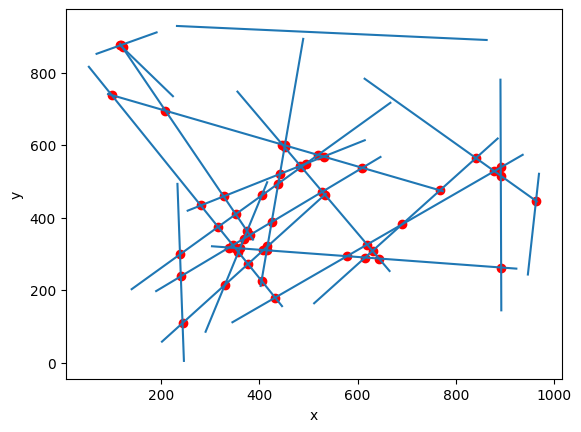

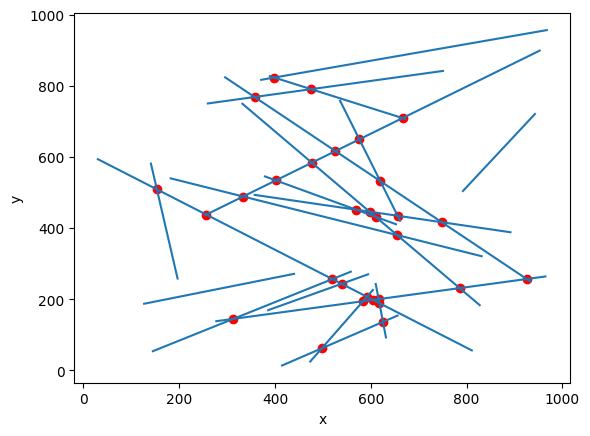

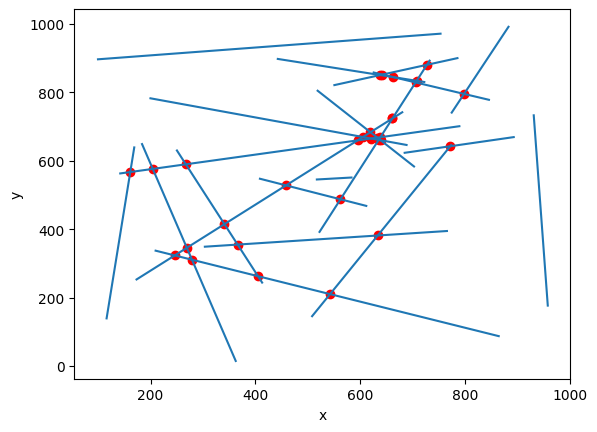

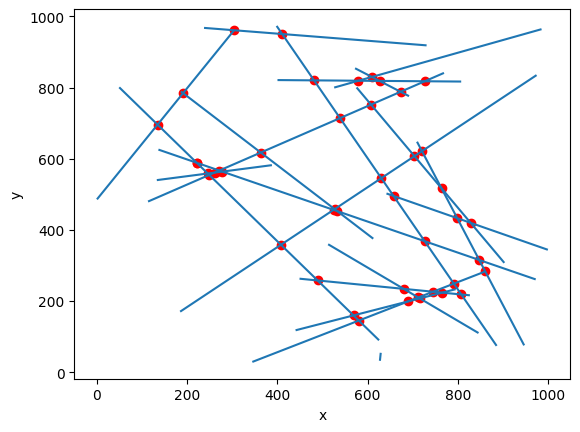

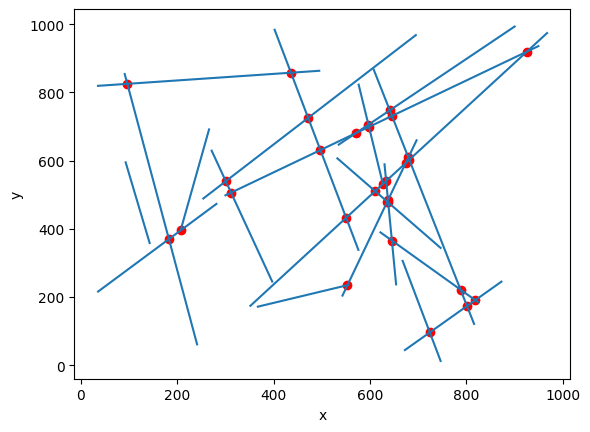

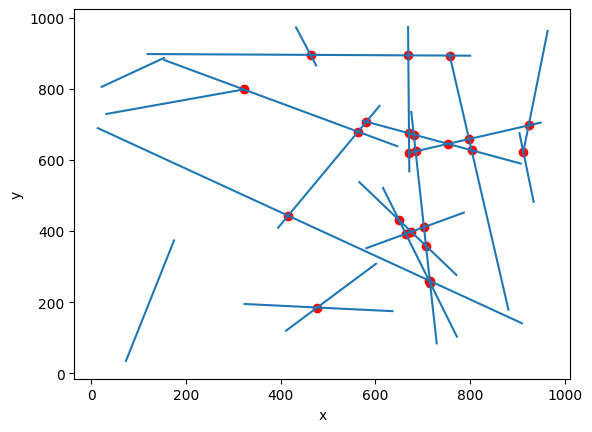

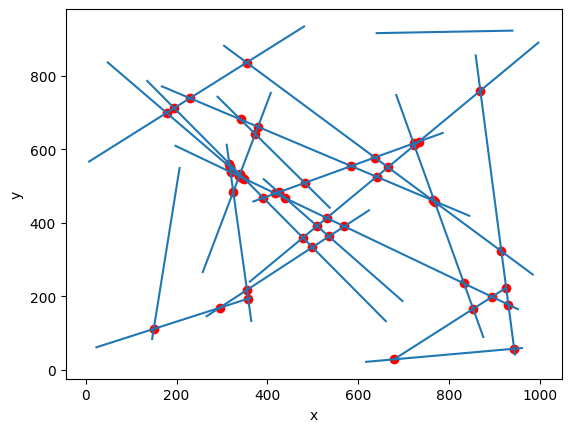

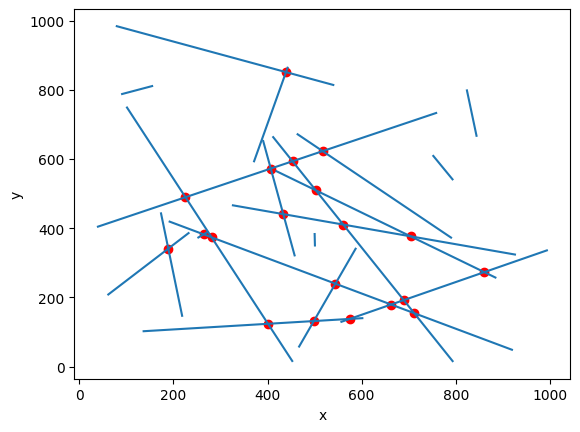

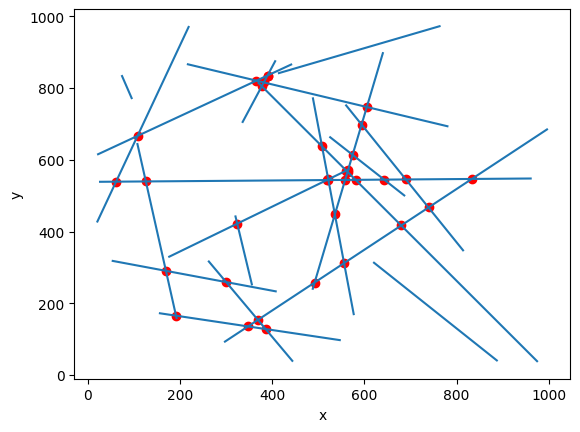

In [25]:
# intersections = [(5.5, 4.5), (2.5, 3.5), (4.0, 1.9999999999999998)]
for i in range(10):
    section = generate_uniform_sections(1000, 1000, 20)
    try:
        intersections = find_intersections(section)
    except Exception as e:
        print(e)
        print(section)
        continue
    vis = Visualizer()
    for sec in section:
        vis.add_line_segment(sec)
    for point in intersections:
        point = np.array(list(point))
        vis.add_point(point, color='red')
    vis.show()

In [23]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: 

IndexError: tuple index out of range

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
# TODO wizualizacja (jak?)
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
# Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak?

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.